In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Reading Data

In [2]:
fall_data = pd.read_csv('fall_detection.csv')
fall_df = fall_data

In [19]:
fall_data.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [20]:
set(fall_data['ACTIVITY'])

{0, 1, 2, 3, 4, 5}

In [22]:
fall_data.ACTIVITY.replace([0,1,2,3,4,5],[1,2,3,4,5,6],inplace=True)

In [23]:
set(fall_data['ACTIVITY'])

{1, 2, 3, 4, 5, 6}

In [24]:
fall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [25]:
fall_data.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,3.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,1.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,1.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,4.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,5.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,6.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [26]:
def Checker(x):
    if type(x) is pd.DataFrame: return 0
    elif type(x) is pd.Series: return 1
    else: return -1
    
def dtype(data):
    what = Checker(data)
    if what == 0:
        dtypes = data.dtypes.astype('str')
        dtypes = dtypes.str.split(r'\d').str[0]
    else:
        dtypes = str(data.dtypes)
        dtypes = re.split(r'\d', dtypes)[0]
    return dtypes

def describe(data):
    '''Provides an overview of your data
        1. dtype    =  Column type
        2. missing% =  % of the column that is missing
        3. nunique  =  Number of unique values in column
        4. top3     =  Top 3 most occuring items
        5. min      =  Minimum value. If not a number column, then empty
        6. mean     =  Average value. If not a number column, then empty
        7. median   =  Middle value. So sort all numbers, and get middle. If not a number column, then empty
        8. max      =  Maximum value. If not a number column, then empty
        9. sample   =  Random 2 elements
        10. name    =  Column Name
    '''
    dtypes = dtype(data)
    length = len(data)
    missing = ((length - data.count())/length*100)
    
    N = [];    most3 = []
    for dt,col in zip(dtypes,data.columns):
        if dt != 'datetime':
            U = data[col].value_counts()
            N.append(len(U))
            if U.values[0] > 1: most3.append(U.index[:3].tolist())
            else: most3.append([]);
        else: N.append(0); most3.append([]);
            
    df = pd.concat([dtypes, missing], 1)
    df.columns = ['dtype','missing%']
    df['nunique'] = N; df['top3'] = most3
    
    numbers = list(data.columns[df['dtype'].isin(('uint','int','float'))])
    df['min'] = data.min()
    df['mean'] = data[numbers].mean()
    df['median'] = data[numbers].median()
    df['max'] = data.max()
    df['sample'] = data.apply(lambda x : x.sample(2).values.tolist())
    df['name'] = list(data.columns)
    return df.sort_values(['missing%', 'nunique', 'dtype'], ascending = [False, False, True]).reset_index(drop = True)

In [27]:
describe(fall_data)

,dtype,missing%,nunique,top3,min,mean,median,max,sample,name
0,float,0.0,16137,"[51.5672, 12220.0, 4132.52]",4.222420e+01,75271.979925,31189.200,2426140.0,"[4176.44, 27174.2]",SL
1,float,0.0,16009,"[10641.6, 13733.8, 14454.5]",1.954230e+03,10936.842478,9769.355,50895.5,"[19838.8, 10161.0]",TIME
2,float,0.0,11225,"[-2650.0, -2070.0, -2710.0]",-1.262600e+07,-5621.125313,-3361.275,1410000.0,"[-1530.0, -6758.0]",EEG
3,int,0.0,2234,"[292, 5, 249]",5.000000e+00,2894.341472,1581.000,52210.0,"[6057.0, 2327.0]",CIRCLUATION
4,int,0.0,652,"[156, 79, 88]",3.300000e+01,211.536992,180.000,986.0,"[63.0, 537.0]",HR
5,int,0.0,341,"[20, 15, 21]",0.000000e+00,58.251068,44.000,533.0,"[40.0, 75.0]",BP
6,int,0.0,6,"[1, 4, 5]",1.000000e+00,3.361494,4.000,6.0,"[5.0, 1.0]",ACTIVITY


In [28]:
fall_data.isnull().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

# Plotting and Tabulating

/Users/aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


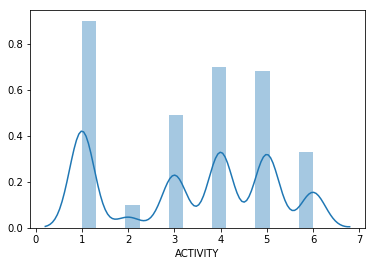

In [29]:
sns.distplot(fall_data['ACTIVITY'], kde=True)

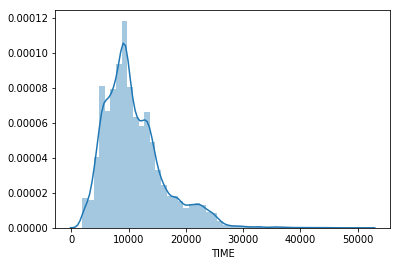

In [30]:
sns.distplot(fall_data['TIME'], kde=True)

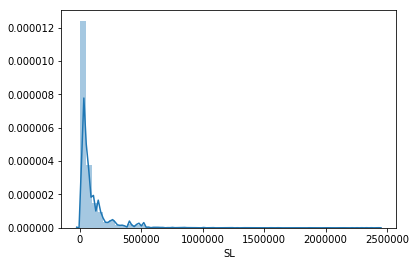

In [31]:
sns.distplot(fall_data['SL'], kde=True)

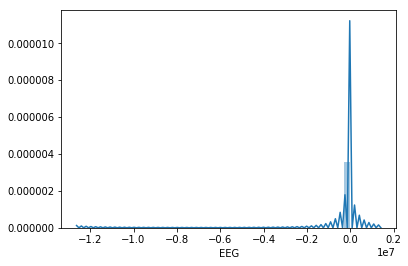

In [32]:
sns.distplot(fall_data['EEG'], kde=True)

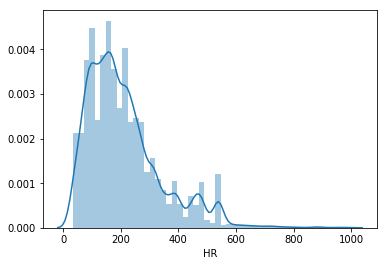

In [33]:
sns.distplot(fall_data['HR'], kde=True)

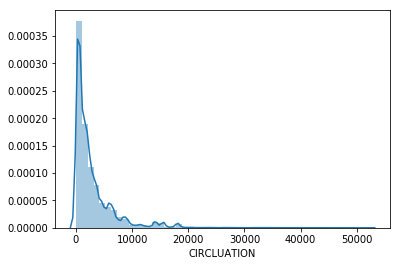

In [34]:
sns.distplot(fall_data['CIRCLUATION'], kde=True)

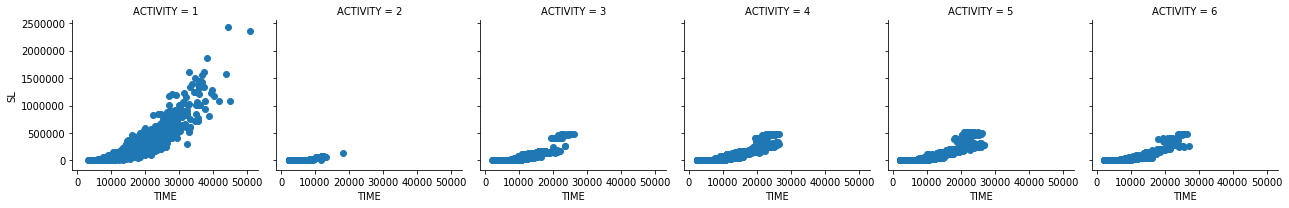

In [35]:
g = sns.FacetGrid(fall_data, col="ACTIVITY") 
g.map(plt.scatter, "TIME", "SL")

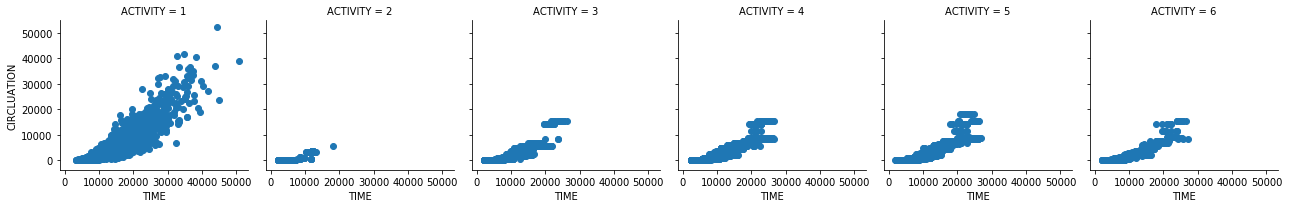

In [36]:
g = sns.FacetGrid(fall_data, col="ACTIVITY") 
g.map(plt.scatter, "TIME", "CIRCLUATION")

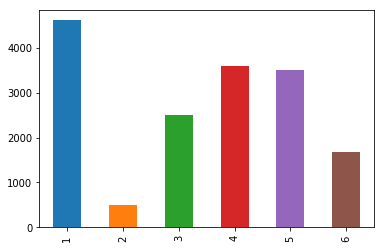

In [37]:
fall_data.ACTIVITY.value_counts().sort_index().plot.bar()

/Users/aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


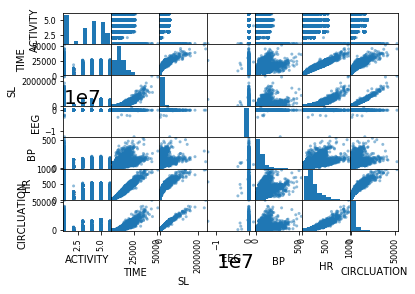

In [38]:
plt.rcParams["figure.figsize"] = (18,9)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
scatter_matrix(fall_data)
plt.show()

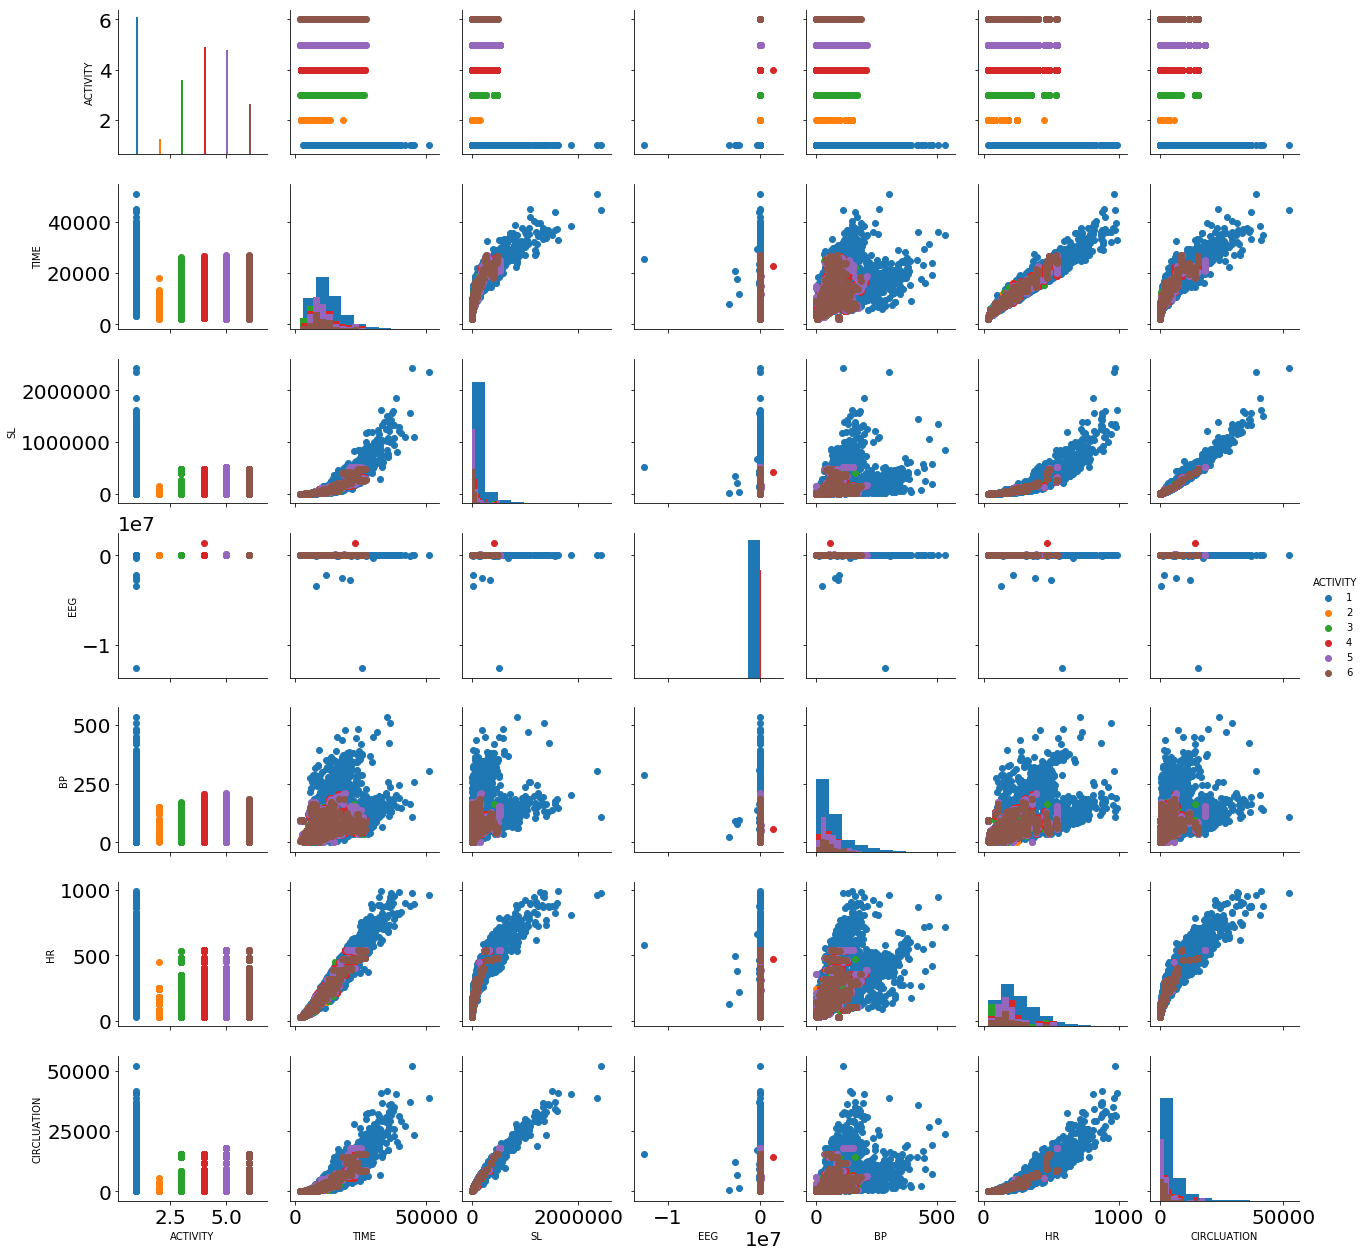

In [39]:
g = sns.PairGrid(fall_data, hue="ACTIVITY")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

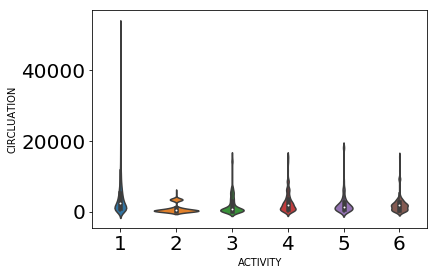

In [40]:
sns.violinplot(data = fall_data, x = 'ACTIVITY', y = 'CIRCLUATION', logy = True)

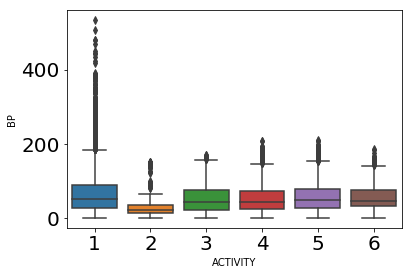

In [41]:
sns.boxplot(data = fall_data, x = 'ACTIVITY', y = 'BP')

# Treatment of Outliers

In [42]:
col=[]
for i in fall_data.columns:
    if fall_data[i].dtype!='object':
        col.append(i)

In [43]:
col

['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

In [44]:
for k in col:
    IQR=np.percentile(fall_data[k],75)-np.percentile(fall_data[k],25)
    Outlier_top=np.percentile(fall_data[i],75)+1.5*IQR
    Outlier_bottom=np.percentile(fall_data[k],25)-1.5*IQR
    fall_data[k]=np.where(fall_data[k] >Outlier_top,Outlier_top,fall_data[k])
    fall_data[k]=np.where(fall_data[k]<Outlier_bottom,Outlier_bottom,fall_data[k])

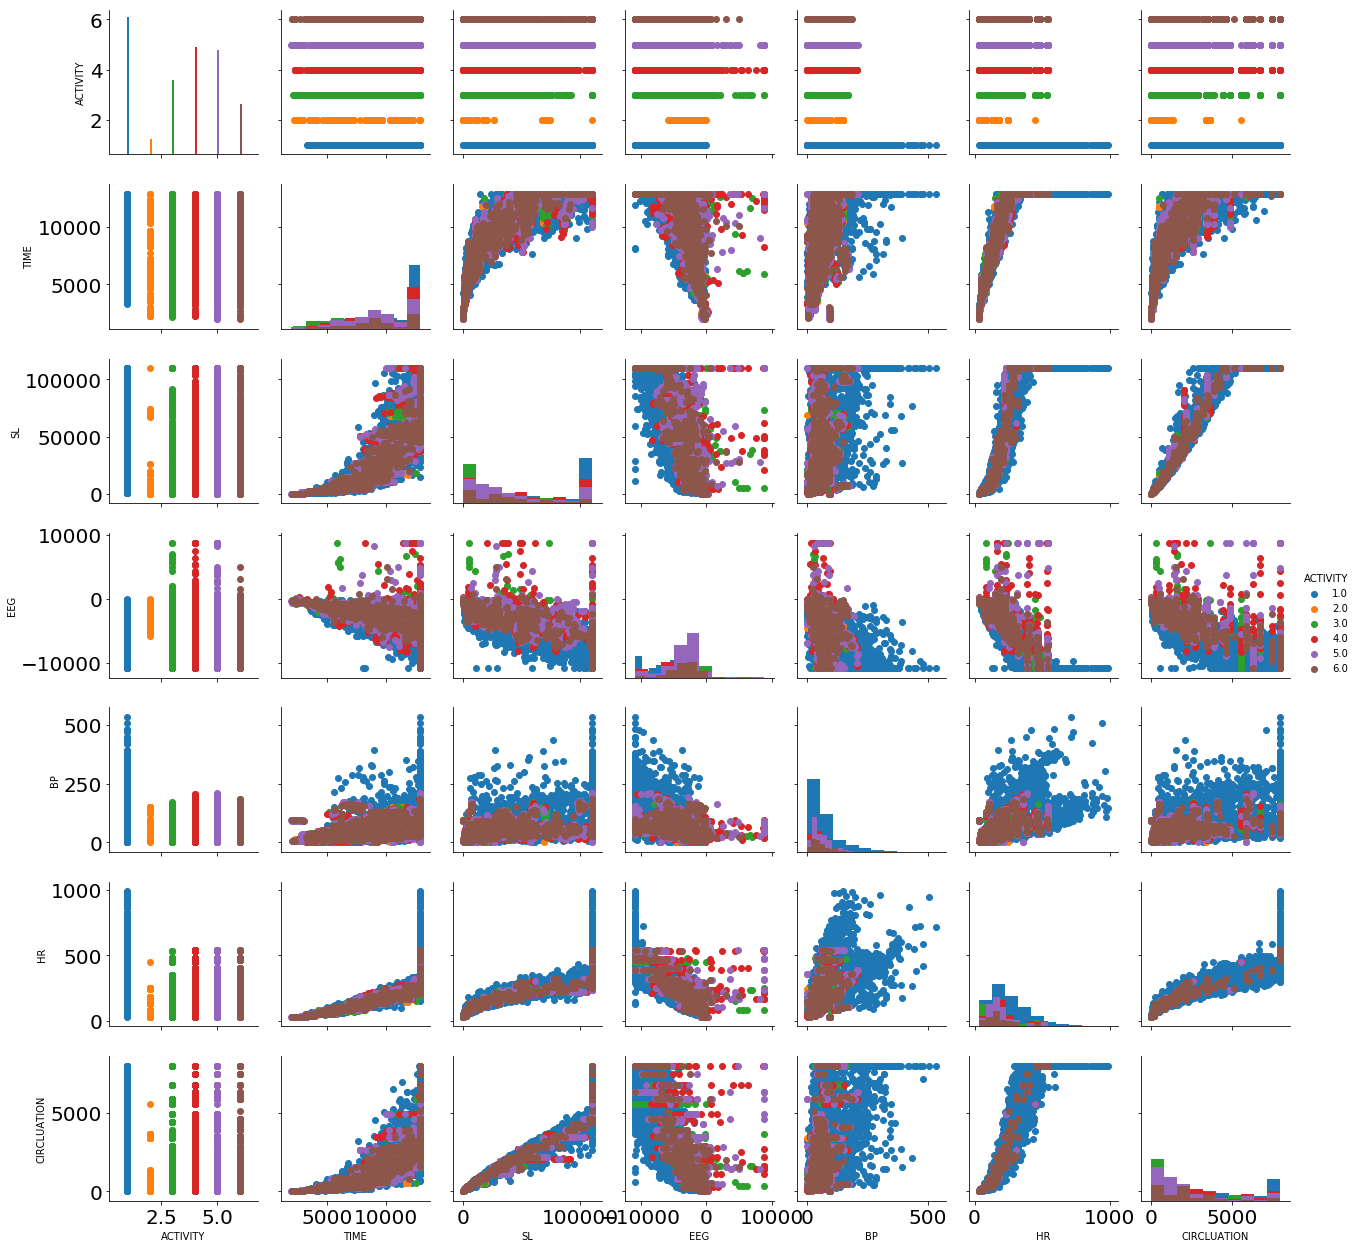

In [45]:
g = sns.PairGrid(fall_data, hue="ACTIVITY")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/aditya/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


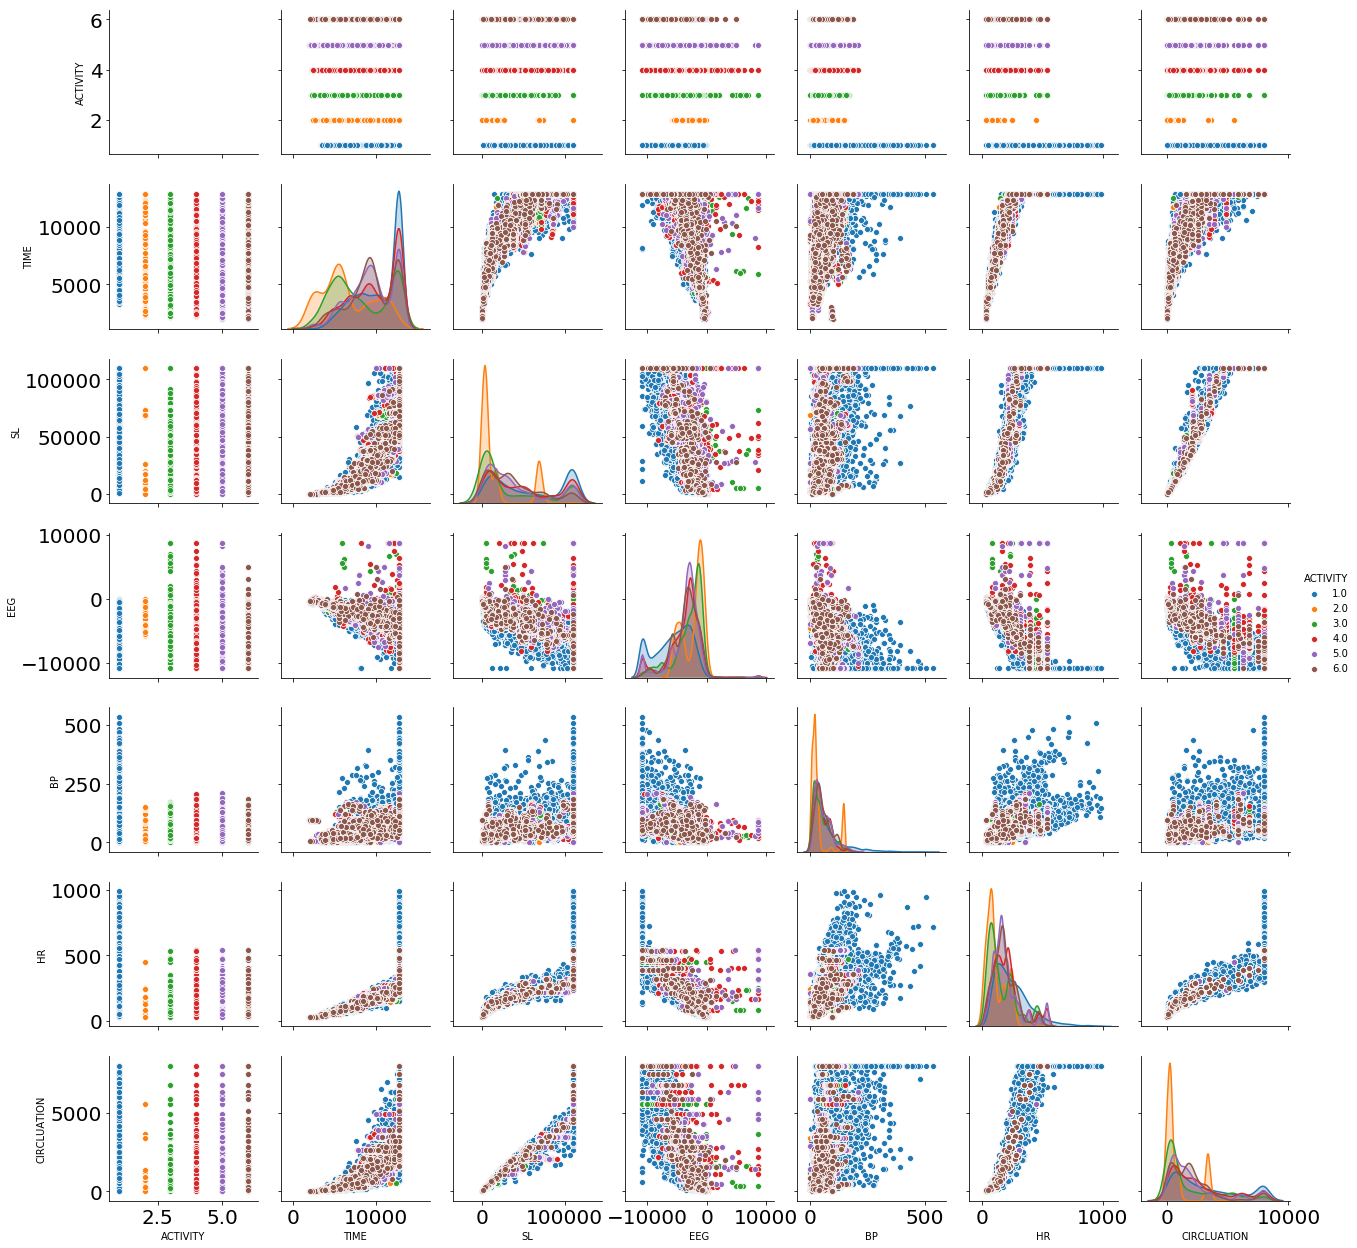

In [46]:
sns.pairplot(fall_data,diag_kind = 'kde', hue="ACTIVITY")

In [47]:
def clean(data, missing = 'mean', remove_id = True):
    '''Cleans entire dataset.
    1. missing =
        mean, max, median, min
        Fills all missing values with column mean/median etc

    2. remove_id = True/False
        Checks data to see if theres an ID column.
        Removes it (not perfect)
    '''
    x = data[data.columns[dtype(data) != 'object']].copy()
    for c in x.columns[x.count()!=len(x)]:
        x[c] = eval('x[c].fillna(x[c].{}())'.format(missing))
    if remove_id:
        for c in x.columns[(dtype(x) == 'int')|(dtype(x) == 'uint')]:
            if x[c].min() >= 0:
                j = (x[c] - x[c].min()).sort_values().diff().sum()
                if j <= 1.001*len(x) and j >= len(x)-1: x.pop(c);
    return x

In [48]:
fall_data = clean(fall_data)

In [49]:
fall_data.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4.0,4722.92,4019.64,-1600.00,13.0,79.0,317.0
1,3.0,4059.12,2191.03,-1146.08,20.0,54.0,165.0
2,3.0,4773.56,2787.99,-1263.38,46.0,67.0,224.0
3,5.0,8271.27,9545.98,-2848.93,26.0,138.0,554.0
4,5.0,7102.16,14148.80,-2381.15,85.0,120.0,809.0


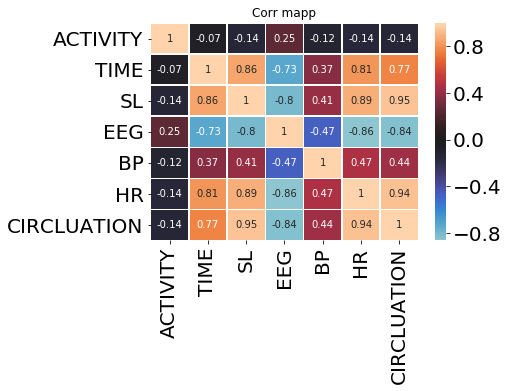

In [50]:
sns.heatmap(fall_data.corr(), annot=True, linewidths=.5, center=0, cbar=True)
plt.title('Corr mapp')
plt.show()

In [51]:
def exclude(data, col):
    '''Only returns a dataframe where the columns in col are not included'''
    if type(col) is str: col = [col]
    columns = list(data.columns)
    leave = list(set(columns) - set(col))
    return data[leave]

In [52]:
Y = fall_data['ACTIVITY']
X = exclude(fall_data, 'ACTIVITY')

In [53]:
Y.shape, X.shape

((16382,), (16382, 6))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11467, 6), (4915, 6), (11467,), (4915,))

# Running First Training Model

In [56]:
import statsmodels.api as sm
# Generalized Linear Model Regression Results
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               ACTIVITY   No. Observations:                11467
Model:                            GLM   Df Residuals:                    11460
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 12 Jan 2019   Deviance:                          nan
Time:                        12:14:20   Pearson chi2:                 4.47e+20
No. Iterations:                   100   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.917e+17      3e+06   2.64e+11      0.000    7.92e+17    7.92e+17
TIME         9.768e+13    498.269   1.96e+11      0.000    9.77e+13    9.77e+13
CIRCLUATION  1.818e+14   1292.347   1.41e+11      0.000    1.82e+14    1.82e+14
EEG          1.357e+14    432.836   3.13e+11      0.000    1.36e+14    1.36e+14
BP           -1.06e+14   1.51e+04  -7.02e+09      0.000   -1.06e+14   -1.06e+14
HR          -5.019e+14   1.72e+04  -2.91e+10      0.000   -5.02e+14   -5.02e+14
SL          -1.008e+13     67.965  -1.48e+11      0.000   -1.01e+13   -1.01e+13
===============================================================================
"""

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 4)             # running RFE with 6 variables as output
rfe = rfe.fit(X,Y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ True False  True  True  True False]
[1 2 1 1 1 3]


/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
# Variables selected by RFE 
col = ['TIME', 'BP', 'EEG', 'HR']

In [68]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)
#logsk.fit(X_train, y_train)

/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [69]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/Users/aditya/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(m

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               ACTIVITY   No. Observations:                11467
Model:                            GLM   Df Residuals:                    11462
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 12 Jan 2019   Deviance:                          nan
Time:                        12:18:04   Pearson chi2:                 4.47e+20
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.805e+17   2.39e+06   4.11e+11      0.000    9.81e+17    9.81e+17
TIME        4.709e+13    360.074   1.31e+11      0.000    4.71e+13    4.71e+13
BP         -1.235e+14   1.51e+04  -8.18e+09      0.000   -1.24e+14   -1.24e+14
EEG         1.315e+14    427.932   3.07e+11      0.000    1.31e+14    1.31e+14
HR          7.781e+14   1.12e+04   6.95e+10      0.000    7.78e+14    7.78e+14
==============================================================================
"""

# Making Predictions

In [71]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
cols = ["Standing", "Walking", "Sitting", "Falling", "Cramps", "Running"]
y_pred_df = pd.DataFrame(y_pred, columns = cols)
y_pred_df.head()


,Standing,Walking,Sitting,Falling,Cramps,Running
0,0.182761,0.080512,0.180212,0.183923,0.212370,0.160222
1,0.273229,0.011964,0.149611,0.191629,0.265380,0.108186
2,0.194113,0.042599,0.202570,0.141273,0.268207,0.151239
3,0.226318,0.019932,0.169944,0.187410,0.270113,0.126283
4,0.155773,0.056840,0.190101,0.199442,0.240254,0.157591


In [75]:
y_pred_df['pred_Standing'] = y_pred_df.Standing.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df['pred_Walking'] = y_pred_df.Walking.map( lambda x: 2 if x > 0.5 else 0)
y_pred_df['pred_Sitting'] = y_pred_df.Sitting.map( lambda x: 3 if x > 0.5 else 0)
y_pred_df['pred_Falling'] = y_pred_df.Falling.map( lambda x: 4 if x > 0.5 else 0)
y_pred_df['pred_Cramps'] = y_pred_df.Cramps.map( lambda x: 5 if x > 0.5 else 0)
y_pred_df['pred_Running'] = y_pred_df.Running.map( lambda x: 6 if x > 0.5 else 0)
y_pred_df.head()

,Standing,Walking,Sitting,Falling,Cramps,Running,pred_Standing,pred_Walking,pred_Sitting,pred_Falling,pred_Cramps,pred_Running
0,0.182761,0.080512,0.180212,0.183923,0.212370,0.160222,0,0,0,0,0,0
1,0.273229,0.011964,0.149611,0.191629,0.265380,0.108186,0,0,0,0,0,0
2,0.194113,0.042599,0.202570,0.141273,0.268207,0.151239,0,0,0,0,0,0
3,0.226318,0.019932,0.169944,0.187410,0.270113,0.126283,0,0,0,0,0,0
4,0.155773,0.056840,0.190101,0.199442,0.240254,0.157591,0,0,0,0,0,0


# PCA on the data

In [76]:
X_train.shape

(11467, 6)

In [77]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [78]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [79]:
pca.components_

array([[ 6.37080889e-02,  5.68614184e-02, -5.70856586e-02,
         4.85036744e-04,  2.88181517e-03,  9.94706362e-01],
       [-2.74467302e-01, -1.58339021e-01,  9.44790792e-01,
        -5.95075604e-03, -1.96170452e-02,  8.09109053e-02],
       [ 9.40271720e-01, -2.44089772e-01,  2.35012627e-01,
        -1.18849361e-03, -1.63142997e-03, -3.27759994e-02],
       [ 1.90560176e-01,  9.53661145e-01,  2.20884194e-01,
         4.18262052e-03,  4.97333071e-02, -5.41896416e-02],
       [-5.97973202e-03, -2.27710307e-02,  7.52023454e-03,
         9.37149147e-01,  3.48052039e-01,  6.50920265e-04],
       [-1.22120326e-02, -4.61261108e-02,  5.85418361e-03,
        -3.48850860e-01,  9.35943685e-01,  1.21340336e-03]])

In [80]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.063708,-0.274467,TIME
1,0.056861,-0.158339,CIRCLUATION
2,-0.057086,0.944791,EEG
3,0.000485,-0.005951,BP
4,0.002882,-0.019617,HR


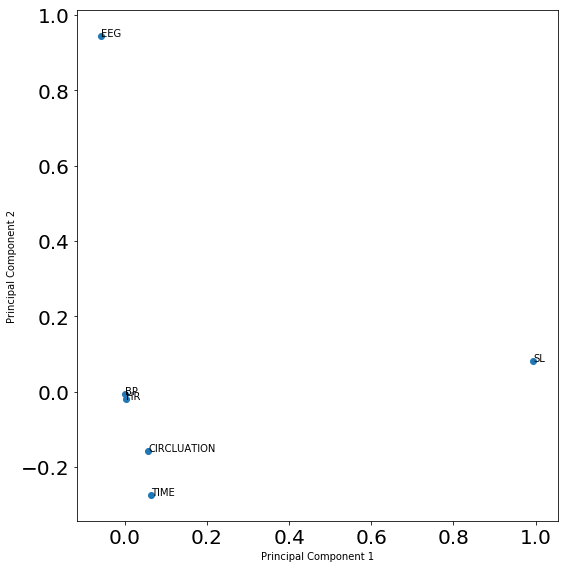

In [81]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [82]:
pca.explained_variance_ratio_

array([9.96350732e-01, 1.98869267e-03, 1.41296535e-03, 2.45730273e-04,
       1.10507794e-06, 7.74990374e-07])

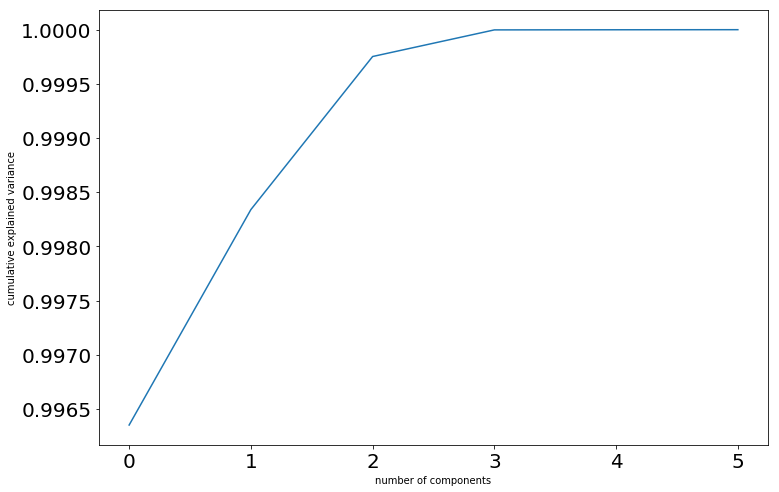

In [83]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 2 components are enough to describe 99.95% of the variance in the dataset
We'll choose 2 components for our modeling

In [84]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [85]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(11467, 2)

In [86]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

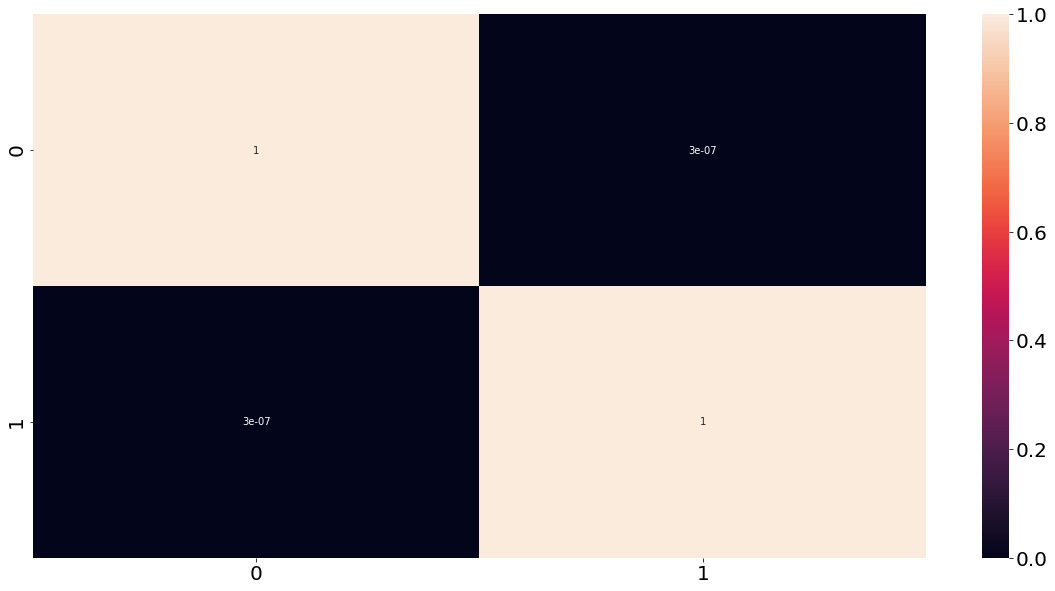

In [87]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [88]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4915, 2)

In [89]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aditya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [95]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
#"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))
#metrics.roc_auc_score(y_test, pred_probs_test)

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 3120     NaN
5147     red
4798     NaN
2663     NaN
11283    NaN
4585     red
11442    red
3671     NaN
4315     NaN
7624     red
505      NaN
9823     NaN
14683    NaN
3910     NaN
1907     NaN
2276     NaN
1135     NaN
1706     red
14024    NaN
13027    NaN
10307    NaN
9557     NaN
15222    NaN
10541    NaN
16160    NaN
4839     red
6543     NaN
5455     NaN
2920     NaN
958      NaN
        ... 
2434     red
6230     red
15453    red
5769     NaN
9723     NaN
11152    NaN
7738     NaN
1340     NaN
10091    NaN
11492    NaN
9871     NaN
4376     NaN
10992    NaN
13297    NaN
802      NaN
5646     NaN
7906     NaN
13890    NaN
4149     NaN
10082    NaN
14260    NaN
350      red
14218    NaN
16304    red
79       NaN
12119    NaN
8039     NaN
14147    NaN
6936     NaN
5640     red
Name: ACTIVITY, Length: 11467, dtype: object.

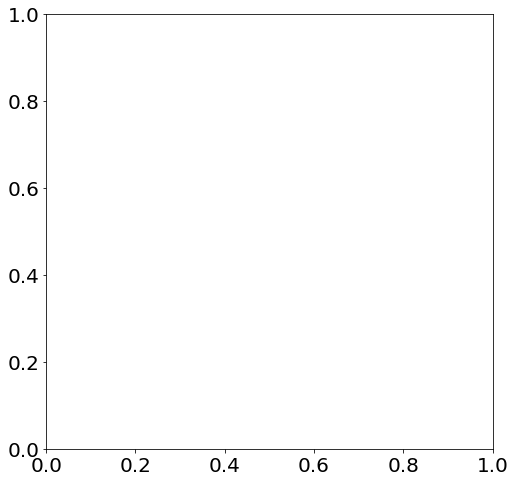

In [96]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()